In [34]:
from pathlib import Path
import numpy as np 
import pandas as pd
import os


In [35]:
direc = Path('E:\data')
filepaths = list(direc.glob(r'**/*.tiff'))
FileNames = list(map(lambda x: os.path.split(x)[1],filepaths))
filepaths = pd.Series(filepaths, name='FilePaths').astype(str)
Labels = pd.Series(FileNames, name='FileNames').astype(str)
img_df = pd.merge(filepaths, Labels, right_index = True, left_index = True)
img_df

,FilePaths,FileNames
0,E:\data\Measurement 1\Images\r01c01f01p01-ch1s...,r01c01f01p01-ch1sk1fk1fl1.tiff
1,E:\data\Measurement 1\Images\r01c01f01p01-ch2s...,r01c01f01p01-ch2sk1fk1fl1.tiff
2,E:\data\Measurement 1\Images\r01c01f01p01-ch3s...,r01c01f01p01-ch3sk1fk1fl1.tiff
3,E:\data\Measurement 1\Images\r01c01f01p01-ch4s...,r01c01f01p01-ch4sk1fk1fl1.tiff
4,E:\data\Measurement 1\Images\r01c01f02p01-ch1s...,r01c01f02p01-ch1sk1fk1fl1.tiff
...,...,...
13819,E:\data\Measurement 1\Images\r16c24f08p01-ch4s...,r16c24f08p01-ch4sk1fk1fl1.tiff
13820,E:\data\Measurement 1\Images\r16c24f09p01-ch1s...,r16c24f09p01-ch1sk1fk1fl1.tiff
13821,E:\data\Measurement 1\Images\r16c24f09p01-ch2s...,r16c24f09p01-ch2sk1fk1fl1.tiff
13822,E:\data\Measurement 1\Images\r16c24f09p01-ch3s...,r16c24f09p01-ch3sk1fk1fl1.tiff


In [36]:
img_df['Row'] = img_df['FileNames'].apply(lambda x: x[1:3])
img_df['Column'] = img_df['FileNames'].apply(lambda x: x[4:6])
img_df['F'] = img_df['FileNames'].apply(lambda x: x[7:9]) #IDK what is this
img_df['P'] = img_df['FileNames'].apply(lambda x: x[10:12]) #Idk what is this
img_df['Channel'] = img_df['FileNames'].apply(lambda x: x[15:16])
img_df['Rest'] = img_df['FileNames'].apply(lambda x: x[16:-5])

In [37]:
img_df

,FilePaths,FileNames,Row,Column,F,P,Channel,Rest
0,E:\data\Measurement 1\Images\r01c01f01p01-ch1s...,r01c01f01p01-ch1sk1fk1fl1.tiff,01,01,01,01,1,sk1fk1fl1
1,E:\data\Measurement 1\Images\r01c01f01p01-ch2s...,r01c01f01p01-ch2sk1fk1fl1.tiff,01,01,01,01,2,sk1fk1fl1
2,E:\data\Measurement 1\Images\r01c01f01p01-ch3s...,r01c01f01p01-ch3sk1fk1fl1.tiff,01,01,01,01,3,sk1fk1fl1
3,E:\data\Measurement 1\Images\r01c01f01p01-ch4s...,r01c01f01p01-ch4sk1fk1fl1.tiff,01,01,01,01,4,sk1fk1fl1
4,E:\data\Measurement 1\Images\r01c01f02p01-ch1s...,r01c01f02p01-ch1sk1fk1fl1.tiff,01,01,02,01,1,sk1fk1fl1
...,...,...,...,...,...,...,...,...
13819,E:\data\Measurement 1\Images\r16c24f08p01-ch4s...,r16c24f08p01-ch4sk1fk1fl1.tiff,16,24,08,01,4,sk1fk1fl1
13820,E:\data\Measurement 1\Images\r16c24f09p01-ch1s...,r16c24f09p01-ch1sk1fk1fl1.tiff,16,24,09,01,1,sk1fk1fl1
13821,E:\data\Measurement 1\Images\r16c24f09p01-ch2s...,r16c24f09p01-ch2sk1fk1fl1.tiff,16,24,09,01,2,sk1fk1fl1
13822,E:\data\Measurement 1\Images\r16c24f09p01-ch3s...,r16c24f09p01-ch3sk1fk1fl1.tiff,16,24,09,01,3,sk1fk1fl1


In [38]:
well_df = pd.read_csv('E:\data\Cell-Painting-HepG2-Plate-Layouts.csv', usecols=[0,1,2])
well_df 

,Well,Compound,Concentration [uM]
0,A01,Berberine Chloride,50.000000
1,A02,Berberine Chloride,25.000000
2,A03,Berberine Chloride,12.500000
3,A04,Berberine Chloride,6.250000
4,A05,Berberine Chloride,3.166667
...,...,...,...
379,P20,Tetrandrine,0.166667
380,P21,Tetrandrine,0.083333
381,P22,Tetrandrine,0.041667
382,P23,DMSO,NaN


In [39]:
control_df = pd.read_csv('E:\data\Cell-Painting-HepG2-Plate-Layouts.csv', usecols=[5,6]).dropna()
control_df 

,Unnamed: 5,Unnamed: 6
0,Control Negative,DMSO
1,Control Positive 1,Berberine Chloride 50 uM
2,Control Positive 2,Brefeldin A 50 uM
3,Control Positive 3,Fluphenazine 50 uM
4,Control Positive 4,Latrunculin B 50 uM
5,Control Positive 5,Nocodazole 50 uM
6,Control Positive 6,Rapamycin 50 uM
7,Control Positive 7,Rotenone 50 uM
8,Control Positive 8,Tetrandrine 50 uM


In [40]:
import cv2
import matplotlib.pyplot as plt

In [46]:
path = img_df['FilePaths'][1]
path

'E:\\data\\Measurement 1\\Images\\r01c01f01p01-ch2sk1fk1fl1.tiff'

In [47]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
img.shape


(1080, 1080)

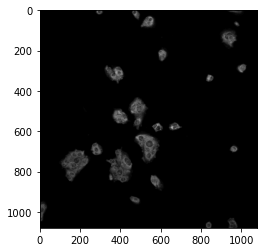

In [48]:
plt.imshow(img, cmap='gray')
plt.show()

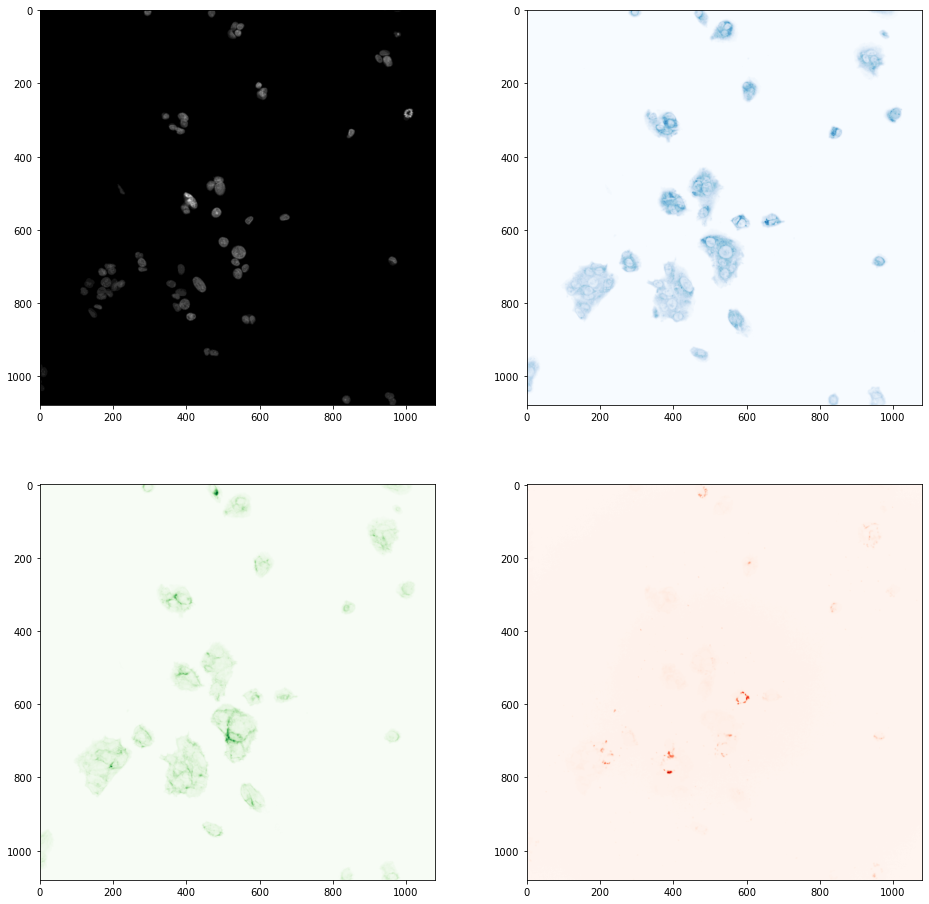

In [51]:
path_df = [0, img_df['FilePaths'][0], img_df['FilePaths'][1], img_df['FilePaths'][2], img_df['FilePaths'][3]]
color_df = [0, 'gray', 'Blues', 'Greens', 'Reds']
fig = plt.figure(figsize=(16, 16))
columns = 2
rows = 2
for i in range(1, columns*rows +1):
    path = path_df[i]
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap=color_df[i])
plt.show()

In [55]:
from PIL import Image


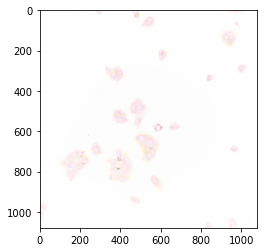

In [60]:
path_df = [img_df['FilePaths'][0], img_df['FilePaths'][1], img_df['FilePaths'][2], img_df['FilePaths'][3]]
c,m,y,k = [ Image.fromarray(cv2.imread(path, cv2.IMREAD_GRAYSCALE)) for path in path_df]
image = Image.merge("CMYK", (c,m,y,k))
plt.imshow(image)

In [70]:
from itertools import permutations
perm = permutations([c, m, y, k])
i = 0
for xd in list(perm):
    image = Image.merge("CMYK", tuple(xd))
    image.save("images\your_file"+str(i)+".jpeg")
    i+=1
# 